In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap

In [3]:
# load datasets
_,_,pred,meta = load_tc_data(set='validation',results='ke_tracks')
real_2,inputs_2,pred_2,_,_,pred_og,_ = load_tc_data(set='validation',results='kh_tracks')
modular_pred_2 = np.load('/user/home/al18709/work/gan_predictions_20/modular_part2_lowres_predictions_pred-opt_modular_part2_raw.npy')
pred_mraw = np.load('/user/home/al18709/work/gan_predictions_20/validation_pred-opt_modular_part2_raw.npy')
meta_og = pd.read_csv('/user/work/al18709/tc_data_mswep_40/valid_meta.csv')
meta_valid = pd.read_csv('/user/work/al18709/tc_data_flipped/valid_meta.csv')
patchloss_pred = np.load('/user/home/al18709/work/gan_predictions_20/validation_pred-opt_modular_part2_patchloss_raw.npy')


In [4]:
del _

In [5]:
def interp_conserve(array,multi_storm=False):
    if multi_storm==False:
        lr_array = np.zeros((10,10))
        for n in range(10):
            for m in range(10):
                i1 = n*10
                i2 = (n+1)*10
                j1 = m*10
                j2 = (m+1)*10
                cell = np.mean(array[i1:i2,j1:j2])
                lr_array[n,m] = cell
    else:
        lr_array = np.zeros((array.shape[0],10,10))
        for i in range(array.shape[0]):
            for n in range(10):
                for m in range(10):
                    i1 = n*10
                    i2 = (n+1)*10
                    j1 = m*10
                    j2 = (m+1)*10
                    cell = np.mean(array[i1:i2,j1:j2])
                    lr_array[i,n,m] = cell
    return lr_array


Text(0.5, 1.0, 'Truth')

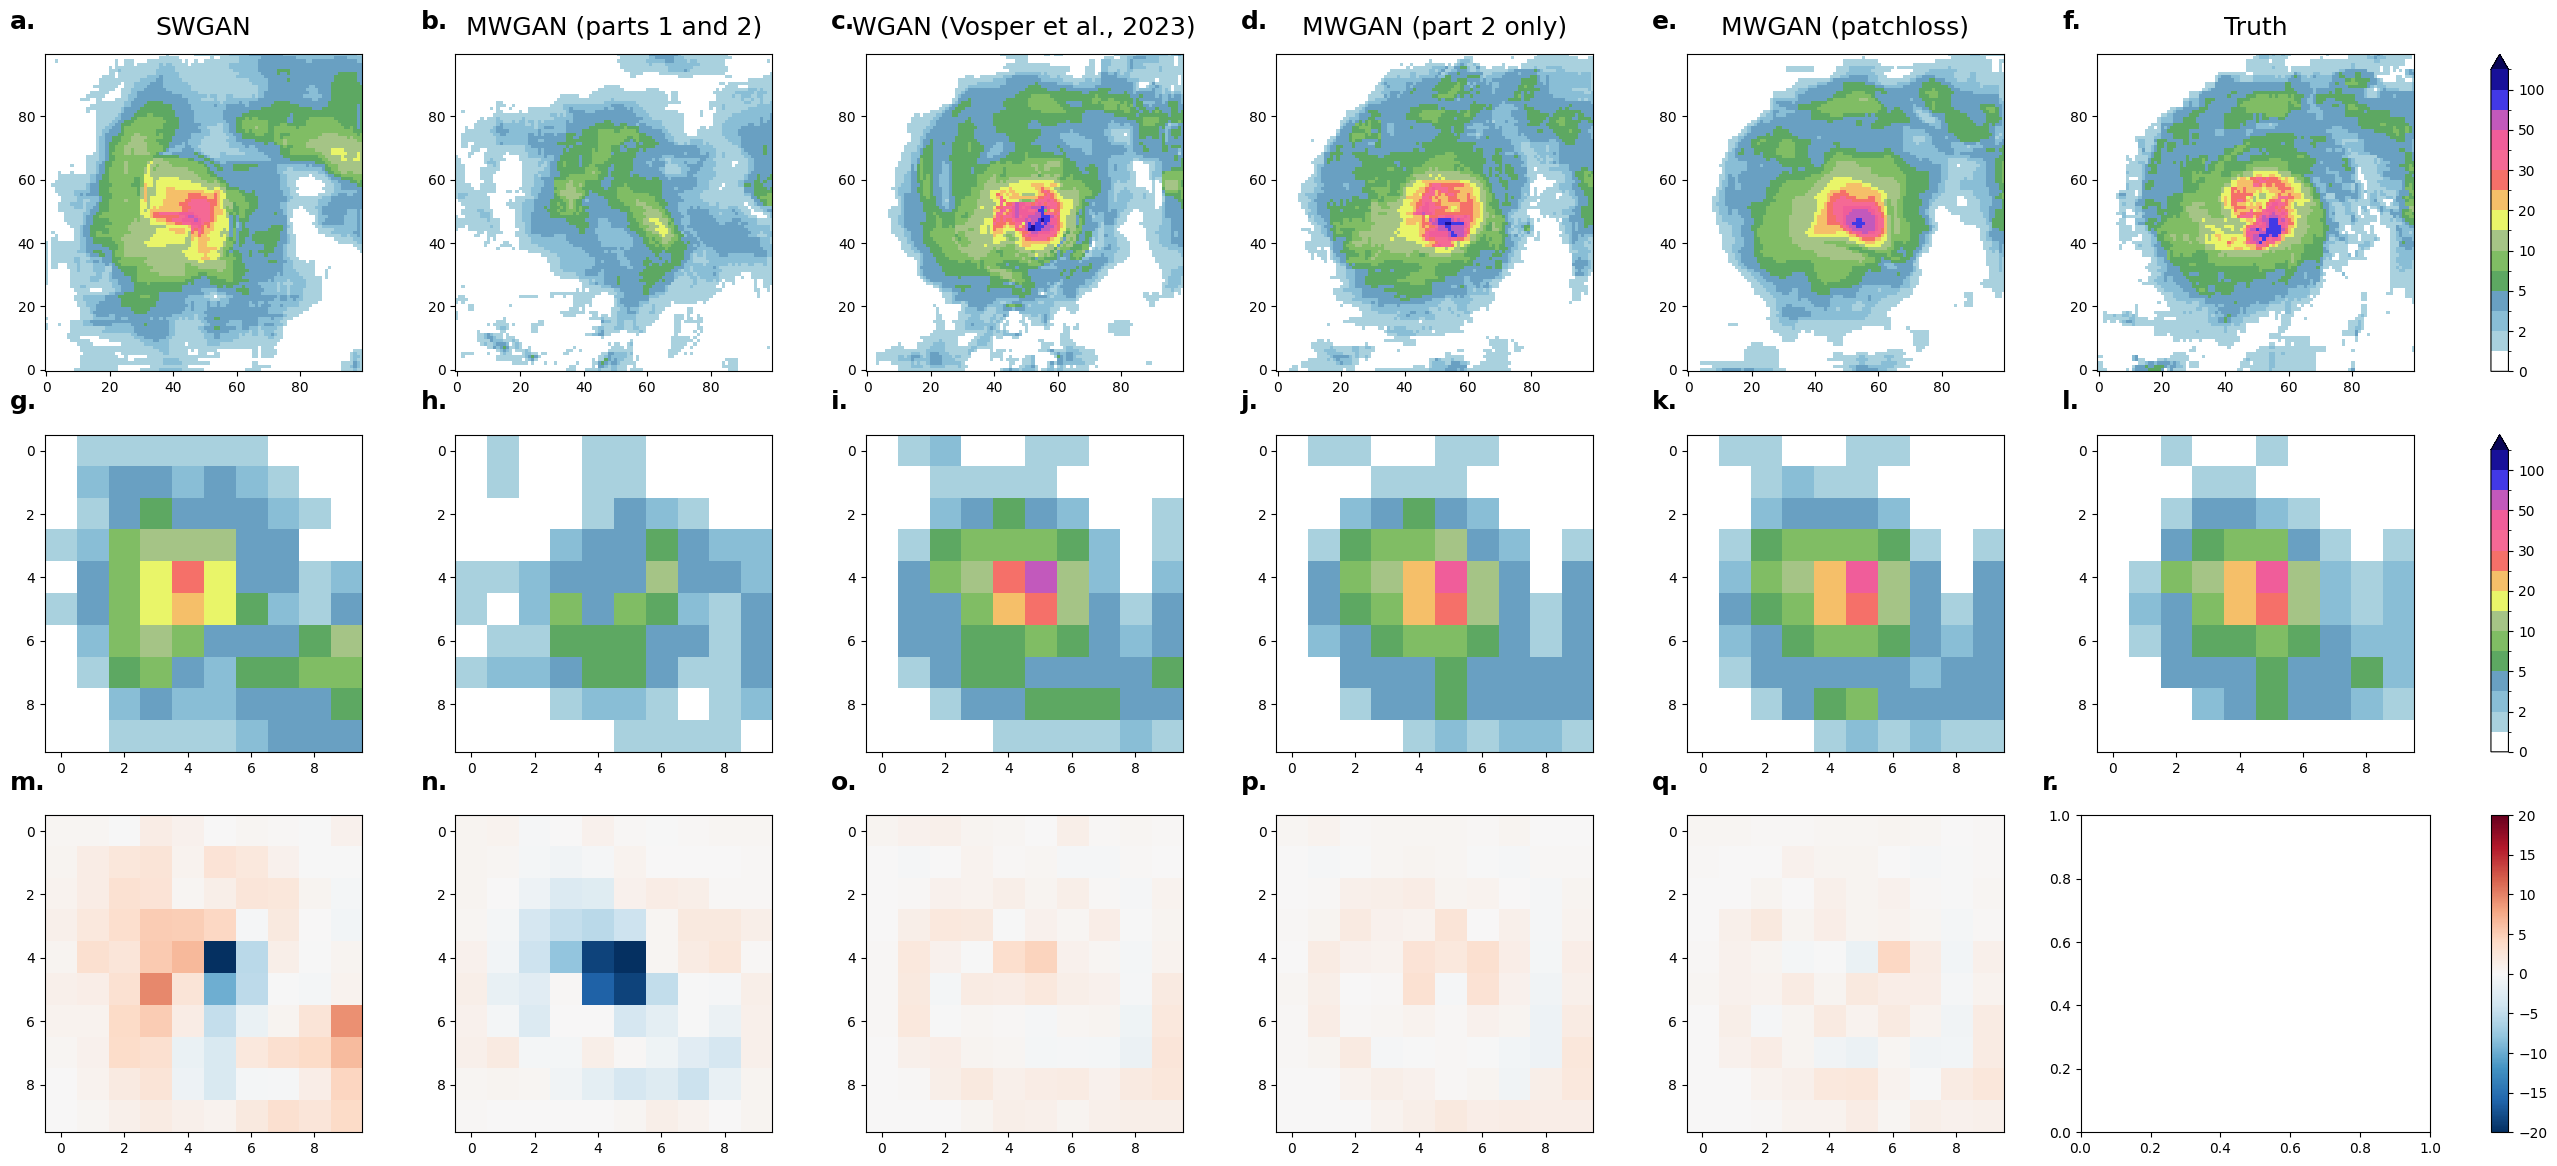

In [6]:
fig,axes = plt.subplots(3,7,figsize=(32,14),gridspec_kw={'width_ratios': [1, 1, 1,1,1,1,0.05]})
precip_cmap,precip_norm = make_cmap()
m1 = axes[0,5].imshow(real_2[976,:,:,0],cmap=precip_cmap,norm=precip_norm)

axes[0,0].imshow(pred[976,:,:,0],cmap=precip_cmap,norm=precip_norm)
axes[0,2].imshow(pred_og[13126,:,:,0],cmap=precip_cmap,norm=precip_norm)
axes[0,1].imshow(modular_pred_2[976,:,:,0],cmap=precip_cmap,norm=precip_norm)
axes[0,3].imshow(pred_mraw[976,:,:,0],cmap=precip_cmap,norm=precip_norm)
axes[0,4].imshow(patchloss_pred[976,:,:,0],cmap=precip_cmap,norm=precip_norm)
for i in range(6):
    axes[0,i].invert_yaxis()

input_storm = inputs_2[976,:,:,0]
pred_storm = interp_conserve(pred[976,:,:,0])
pred_og_storm = interp_conserve(pred_og[13126,:,:,0])
mod_pred_storm = interp_conserve(modular_pred_2[976,:,:,0])
pred_mraw_storm = interp_conserve(pred_mraw[976,:,:,0])
patchloss_storm = interp_conserve(patchloss_pred[976,:,:,0])


m2 = axes[1,5].imshow(inputs_2[976,:,:,0],cmap=precip_cmap,norm=precip_norm)
axes[1,0].imshow(interp_conserve(pred[976,:,:,0]),cmap=precip_cmap,norm=precip_norm)
axes[1,2].imshow(interp_conserve(pred_og[13126,:,:,0]),cmap=precip_cmap,norm=precip_norm)
axes[1,1].imshow(interp_conserve(modular_pred_2[976,:,:,0]),cmap=precip_cmap,norm=precip_norm)
axes[1,3].imshow(interp_conserve(pred_mraw[976,:,:,0]),cmap=precip_cmap,norm=precip_norm)
axes[1,4].imshow(interp_conserve(patchloss_pred[976,:,:,0]),cmap=precip_cmap,norm=precip_norm)
for i in range(6):
    axes[1,i].invert_yaxis()

# axes[2,5].imshow(inputs_2[976,:,:,0],cmap=precip_cmap,norm=precip_norm)
m3 = axes[2,0].imshow(pred_storm-input_storm,cmap='RdBu_r',vmax=20,vmin=-20)
axes[2,2].imshow(pred_og_storm - input_storm,cmap='RdBu_r',vmax=20,vmin=-20)
axes[2,1].imshow(mod_pred_storm - input_storm,cmap='RdBu_r',vmax=20,vmin=-20)
axes[2,3].imshow(pred_mraw_storm - input_storm,cmap='RdBu_r',vmax=20,vmin=-20)
axes[2,4].imshow(patchloss_storm - input_storm,cmap='RdBu_r',vmax=20,vmin=-20)
for i in range(6):
    axes[1,i].invert_yaxis()

plt.colorbar(m1,cax=axes[0,6])
plt.colorbar(m2,cax=axes[1,6])
plt.colorbar(m3,cax=axes[2,6])

tsize = 18
left = -0.11
up = 1.08
axes[0,0].text(left,up, 'a.', transform=axes[0,0].transAxes, size=tsize, weight='bold')
axes[0,1].text(left,up, 'b.', transform=axes[0,1].transAxes, size=tsize, weight='bold')
axes[0,2].text(left,up, 'c.', transform=axes[0,2].transAxes, size=tsize, weight='bold')
axes[0,3].text(left,up, 'd.', transform=axes[0,3].transAxes, size=tsize, weight='bold')
axes[0,4].text(left,up, 'e.', transform=axes[0,4].transAxes, size=tsize, weight='bold')
axes[0,5].text(left,up, 'f.', transform=axes[0,5].transAxes, size=tsize, weight='bold')
# axes[0,1].text(0.6, 0.9, f'Hit rate: {}', transform=axes[0,1].transAxes, size=14)
axes[1,0].text(left,up, 'g.', transform=axes[1,0].transAxes, size=tsize, weight='bold')
axes[1,1].text(left,up, 'h.', transform=axes[1,1].transAxes, size=tsize, weight='bold')
axes[1,2].text(left,up, 'i.', transform=axes[1,2].transAxes, size=tsize, weight='bold')
axes[1,3].text(left,up, 'j.', transform=axes[1,3].transAxes, size=tsize, weight='bold')
axes[1,4].text(left,up, 'k.', transform=axes[1,4].transAxes, size=tsize, weight='bold')
axes[1,5].text(left,up, 'l.', transform=axes[1,5].transAxes, size=tsize, weight='bold')
axes[2,0].text(left,up, 'm.', transform=axes[2,0].transAxes, size=tsize, weight='bold')
axes[2,1].text(left,up, 'n.', transform=axes[2,1].transAxes, size=tsize, weight='bold')
axes[2,2].text(left,up, 'o.', transform=axes[2,2].transAxes, size=tsize, weight='bold')
axes[2,3].text(left,up, 'p.', transform=axes[2,3].transAxes, size=tsize, weight='bold')
axes[2,4].text(left,up, 'q.', transform=axes[2,4].transAxes, size=tsize, weight='bold')
axes[2,5].text(left,up, 'r.', transform=axes[2,5].transAxes, size=tsize, weight='bold')


padding = 14
axes[0,2].set_title('WGAN (Vosper et al., 2023)',fontsize=18,pad=padding)
axes[0,3].set_title('MWGAN (part 2 only)',fontsize=18,pad=padding)
axes[0,0].set_title('SWGAN',fontsize=18,pad=padding)
axes[0,1].set_title('MWGAN (parts 1 and 2)',fontsize=18,pad=padding)
axes[0,4].set_title('MWGAN (patchloss)',fontsize=18,pad=padding)
axes[0,5].set_title('Truth',fontsize=18,pad=padding)



In [7]:
# swgan
swgan_sum = np.sum(pred[:,:,:,0],axis=(1,2))
swgan_cons_sum = np.sum(interp_conserve(pred[:,:,:,0],multi_storm=True),axis=0)








In [8]:
# print(real_og.shape)

In [9]:
# wgan
pred_og_sum = np.sum(pred_og[:,:,:,0],axis=(1,2))
# real_og_sum = np.sum(real_og[:,:,:],axis=(1,2))
pred_og_cons_sum = np.sum(interp_conserve(pred_og[:,:,:,0],multi_storm=True),axis=0)

In [10]:
# # mwgan part 1 and 2
mwgan_sum = np.sum(modular_pred_2[:,:,:,0],axis=(1,2))
mwgan_cons_sum = np.sum(interp_conserve(modular_pred_2[:,:,:,0],multi_storm=True),axis=0)

In [11]:
# # modular part 2
# pred_mraw
mwgan_p2_sum = np.sum(pred_mraw[:,:,:,0],axis=(1,2))
mwgan_p2_cons_sum = np.sum(interp_conserve(pred_mraw[:,:,:,0],multi_storm=True),axis=0)

In [12]:
# # patchloss
# patchloss_pred
patchloss_sum = np.sum(patchloss_pred[:,:,:,0],axis=(1,2))
patchloss_cons_sum = np.sum(interp_conserve(patchloss_pred[:,:,:,0],multi_storm=True),axis=0)

In [13]:
# real
real_sum = np.sum(real_2[:,:,:,0],axis=(1,2))
real_inputs_sum = np.sum(inputs_2[:,:,:,0],axis=(1,2))

In [14]:
print(real_sum.shape)

(15930,)


In [15]:
from matplotlib.patches import PathPatch
from matplotlib.path import Path

/tmp/ipykernel_41370/1872701351.py:25: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=real_sum,y=swgan_sum, shade=True, shade_lowest=False, alpha=0.7, cbar=False, ax=axes[0,0], cmap="Blues")
/tmp/ipykernel_41370/1872701351.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=real_sum,y=swgan_sum, shade=True, shade_lowest=False, alpha=0.7, cbar=False, ax=axes[0,0], cmap="Blues")
/tmp/ipykernel_41370/1872701351.py:26: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=real_sum,y=mwgan_sum, shade=True, shade_lowest=False, alpha=0.7, cbar=False, ax=axes[0,1], cmap="Oranges")
/tmp/ipykernel_41370/1872701351.py:26: FutureWarning

/tmp/ipykernel_41370/1872701351.py:29: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x=real_sum,y=patchloss_sum, shade=True, shade_lowest=False, alpha=1, cbar=False, ax=axes[1,1], cmap="Purples")
/tmp/ipykernel_41370/1872701351.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=real_sum,y=patchloss_sum, shade=True, shade_lowest=False, alpha=1, cbar=False, ax=axes[1,1], cmap="Purples")


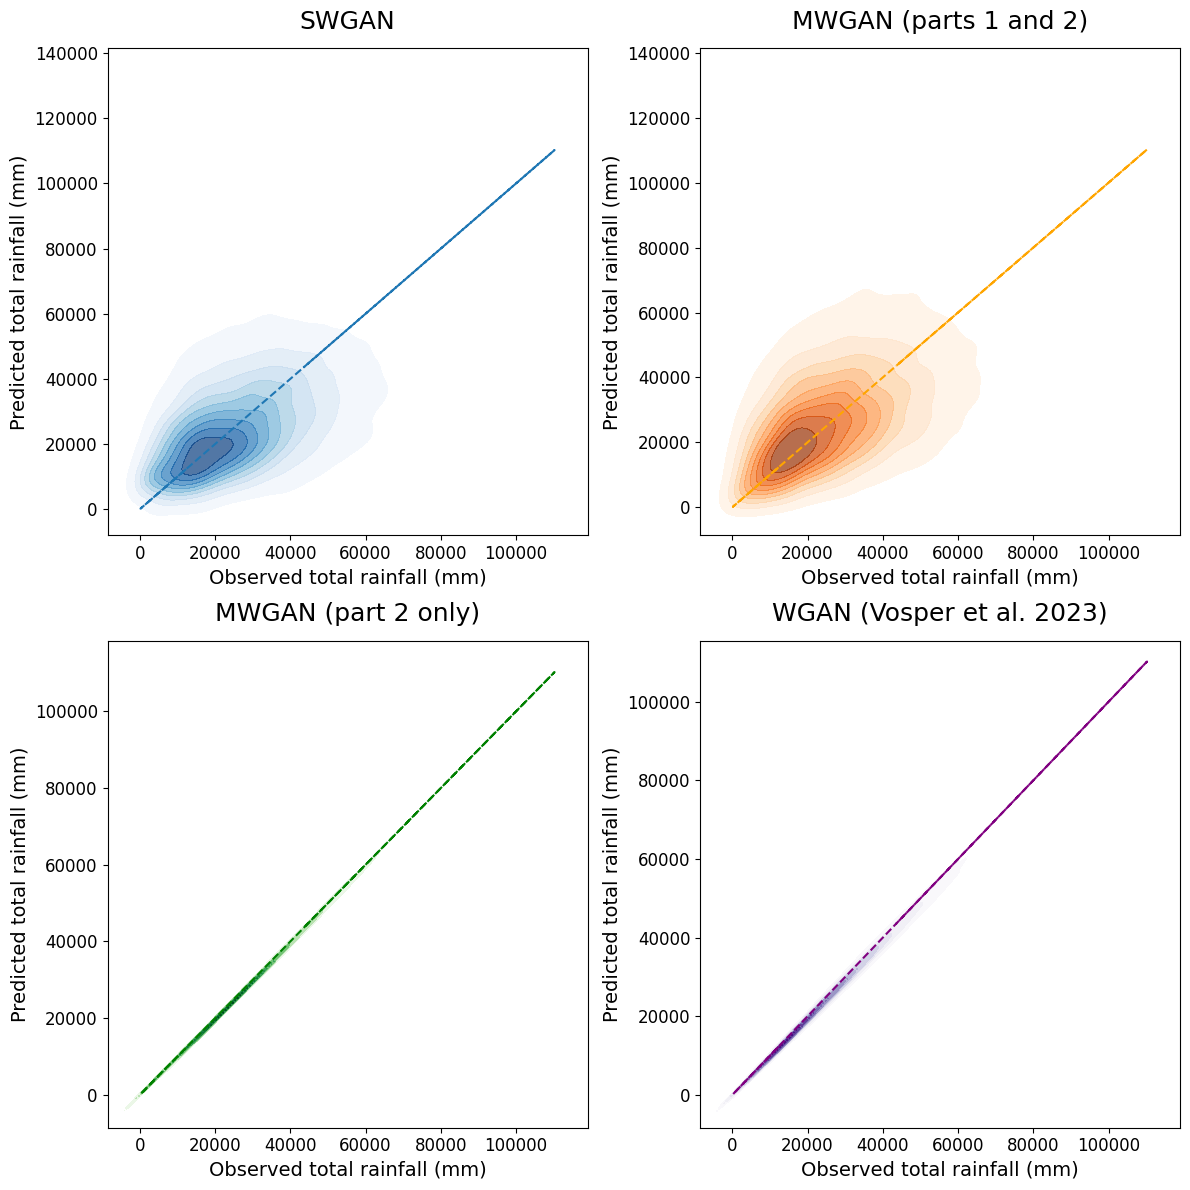

In [16]:
fig,axes = plt.subplots(2,2,figsize=(12,12))
axes[0,0].plot(real_sum,real_sum,linestyle='--')
axes[0,1].plot(real_sum,real_sum,linestyle='--',color='Orange')
# axes[0,2].plot(real_sum,real_sum,linestyle='--',color='Red')
axes[1,0].plot(real_sum,real_sum,linestyle='--',color='Green')
axes[1,1].plot(real_sum,real_sum,linestyle='--',color='Purple')
# axes[1,2].spines[['right', 'top','left','bottom']].set_visible(False)
# axes[1,2].set_visible(False)
# ax.scatter(real_sum,swgan_sum,alpha=0.5)
# ax.scatter(real_sum,mwgan_sum,alpha=0.5)
# ax.scatter(real_sum,pred_og_sum,alpha=0.5)
# ax.scatter(real_sum,mwgan_p2_sum,alpha=0.5)
# ax.scatter(real_sum,patchloss_sum,alpha=0.5)
for ax in axes.flat:
    # ax.set(xlabel='Observed total rainfall (mm)', ylabel=Predicted total rainfall (mm)')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel(xlabel='Observed total rainfall (mm)')
    ax.set_ylabel(ylabel='Predicted total rainfall (mm)')
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)




sns.kdeplot(x=real_sum,y=swgan_sum, shade=True, shade_lowest=False, alpha=0.7, cbar=False, ax=axes[0,0], cmap="Blues")
sns.kdeplot(x=real_sum,y=mwgan_sum, shade=True, shade_lowest=False, alpha=0.7, cbar=False, ax=axes[0,1], cmap="Oranges")
# sns.kdeplot(x=real_og_sum,y=pred_og_sum, shade=True, shade_lowest=False, alpha=0.7, cbar=False, ax=axes[0,2], cmap="Reds")
sns.kdeplot(x=real_sum,y=mwgan_p2_sum, shade=True, shade_lowest=False, alpha=1, cbar=False, ax=axes[1,0], cmap="Greens")
sns.kdeplot(x=real_sum,y=patchloss_sum, shade=True, shade_lowest=False, alpha=1, cbar=False, ax=axes[1,1], cmap="Purples")
# ax.scatter(x=real_sum,y=swgan_sum, color="C0")
# ax.scatter(x=real_sum,y=mwgan_sum, color="C1")

# axes[0,2].set_title('WGAN (Vosper et al., 2023)',fontsize=18,pad=padding)
axes[1,0].set_title('MWGAN (part 2 only)',fontsize=18,pad=padding)
axes[0,0].set_title('SWGAN',fontsize=18,pad=padding)
axes[0,1].set_title('MWGAN (parts 1 and 2)',fontsize=18,pad=padding)
axes[1,1].set_title('WGAN (Vosper et al. 2023)',fontsize=18,pad=padding)
# axes[0,5].set_title('Truth',fontsize=18,pad=padding)
plt.tight_layout()
plt.savefig('figure_12_b.png',bbox_inches='tight')